In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

In [ ]:
# from transformers import BertTokenizer, BertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained("bert-base-uncased")
# text = "Replace me by any text you'd like."
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)


In [ ]:
!sudo apt-get update
!sudo apt-get install nvidia-driver-470

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
E: Could not get lock /var/lib/dpkg/lock-frontend. It is held by process 1826 (apt-get)
N: Be aware that removing the lock file is not a solution and may break your system.
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/loc

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-7mmxsgaf
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-7mmxsgaf
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=21331b83611145f7418a8534de2e9cc49a6269de3a0c1d7d7ae3feb23a3d914d
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwwi84d_/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: prepr

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
ps

<module 'preprocess_kgptalkie' from '/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/__init__.py'>

In [ ]:
df = pd.read_csv("/content/900_data - We_gpt.csv")
df = df[['Full Complaint','Complaint/Non Complaint']]

In [ ]:
df

,Full Complaint,Complaint/Non Complaint
0,Me and my sister got treatments from White den...,1
1,I have booked a diagnostic service on Netmeds....,1
2,"This is in regard to my ** year old Dad, Mr Ja...",1
3,"It is related to my fathers treatment, rather ...",1
4,In the initial conversation with Dr. Amrutha o...,1
...,...,...
871,Seamless Coordination Between Departments\n\nT...,0
872,I recently had the pleasure of undergoing a de...,0
873,"Starting with the seamless payment process, I ...",0
874,I appreciate the efficient handling of the ent...,0


In [ ]:
df["Full Complaint"][0]

'Me and my sister got treatments from White dental clinic, Indirapuram. I had a root canal treatment whose crown was not made properly that I had to change after going to Germany. I have the receipt for the same. Also, he did the fillings but didnt cleaned the underlying infection. Due to which, I had to get it done again from Germany.\n \n My sister, got treatment for multiple teeth. He put crown on all the teeth, that started having problem and as a result, I stopped going for further visits to this doctor. So, I had to go another doctor for correction of the treatment. Now we both published a review on google reviews that is a freedom of speech to tell people our honest reviews. They sent us an legal letter to remove the review and pay a huge compensation.'

In [ ]:


df['word_counts'] = df['Full Complaint'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['Full Complaint'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['Full Complaint'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['Full Complaint'].apply(lambda x: ps.get_stopwords_counts(x))


In [ ]:
sentiment_pipeline(df["Full Complaint"][871])

[{'label': 'POSITIVE', 'score': 0.9878425598144531}]

In [ ]:

df.head()

,Full Complaint,Complaint/Non Complaint,word_counts,char_counts,avg_wordlength,stopwords_counts
0,Me and my sister got treatments from White den...,1,141,623,4.418440,67
1,I have booked a diagnostic service on Netmeds....,1,72,342,4.750000,30
2,"This is in regard to my ** year old Dad, Mr Ja...",1,365,1718,4.706849,173
3,"It is related to my fathers treatment, rather ...",1,232,1081,4.659483,102
4,In the initial conversation with Dr. Amrutha o...,1,91,403,4.428571,45


In [ ]:
df['Full Complaint'] = df['Full Complaint'].str.lower()
df['Full Complaint'] = df['Full Complaint'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: >

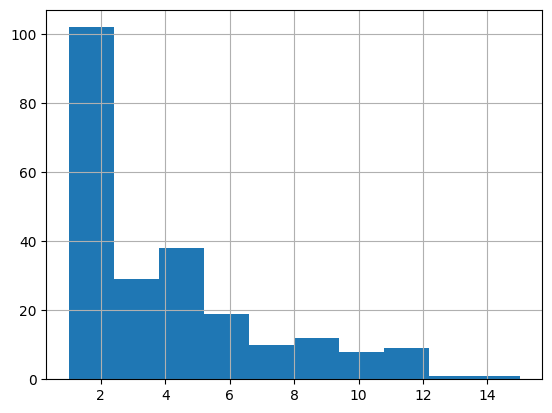

In [ ]:

df['word_counts'].value_counts().hist(bins=10)

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [ ]:

class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length",
                              max_length=self.max_len)

    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'bert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
X = df['Full Complaint'].tolist()
y = df['Complaint/Non Complaint'].tolist()

In [ ]:
dataset = CustomDataset(X, y, tokenizer)

In [ ]:
dataset

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)


In [ ]:

from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)
  precision = precision_score(labels, preds)
  recall = recall_score(labels, preds)
  conf_matrix = confusion_matrix(labels, preds)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1, "precision":precision,"recall":recall, "conf_matrix":conf_matrix}

In [ ]:

from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_setiment"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 10,
    evaluation_strategy = 'epoch'
)

In [ ]:

trainer = Trainer(model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)

In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Conf Matrix
1,No log,0.539463,0.715909,0.715616,0.784810,0.652632,[[64 17] [33 62]]
2,No log,0.460532,0.772727,0.769100,0.747748,0.873684,[[53 28] [12 83]]
3,No log,0.494346,0.789773,0.789861,0.808511,0.800000,[[63 18] [19 76]]
4,No log,0.561093,0.789773,0.786738,0.763636,0.884211,[[55 26] [11 84]]
5,No log,0.647101,0.784091,0.784258,0.843373,0.736842,[[68 13] [25 70]]
6,No log,0.811137,0.772727,0.772199,0.857143,0.694737,[[70 11] [29 66]]
7,No log,0.791169,0.784091,0.782845,0.776699,0.842105,[[58 23] [15 80]]
8,No log,0.840251,0.784091,0.782845,0.776699,0.842105,[[58 23] [15 80]]
9,No log,0.831642,0.801136,0.800806,0.806122,0.831579,[[62 19] [16 79]]
10,No log,0.828578,0.795455,0.795241,0.804124,0.821053,[[62 19] [17 78]]


Trainer is attempting to log a value of "[[64 17]
 [33 62]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[53 28]
 [12 83]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[63 18]
 [19 76]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[55 26]
 [11 84]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[68 13]
 [25 70]]" of type <class 'numpy.n

TrainOutput(global_step=440, training_loss=0.16926245255903763, metrics={'train_runtime': 701.0043, 'train_samples_per_second': 9.986, 'train_steps_per_second': 0.628, 'total_flos': 1841777387520000.0, 'train_loss': 0.16926245255903763, 'epoch': 10.0})

In [ ]:

trainer.save_model(model_name)


In [ ]:
df

,Full Complaint,Complaint/Non Complaint,word_counts,char_counts,avg_wordlength,stopwords_counts
0,me and my sister got treatments from white den...,1,141,623,4.418440,67
1,i have booked a diagnostic service on netmeds....,1,72,342,4.750000,30
2,"this is in regard to my ** year old dad, mr ja...",1,365,1718,4.706849,173
3,"it is related to my fathers treatment, rather ...",1,232,1081,4.659483,102
4,in the initial conversation with dr. amrutha o...,1,91,403,4.428571,45
...,...,...,...,...,...,...
871,seamless coordination between departments\n\nt...,0,35,228,6.514286,10
872,i recently had the pleasure of undergoing a de...,0,40,206,5.150000,18
873,"starting with the seamless payment process, i ...",0,52,276,5.307692,22
874,i appreciate the efficient handling of the ent...,0,48,284,5.916667,16


In [ ]:
df["Full Complaint"][555]

"on 28th september the patient came to hospital as he was having fever. so hospital took ct scan and kept him in suspected ward with three other fellows. it's been more than 24 hours no covid test has been taken yet. i think apollo is doing this intentionally so that he should come covid 19 positive. cbc test done yesterday but no reports came yet"

In [ ]:


text = df["Full Complaint"][871]
pipe = pipeline('text-classification', model_name)
pipe(text)

[{'label': 'LABEL_0', 'score': 0.9975230097770691}]

In [ ]:

tok = AutoTokenizer.from_pretrained(model_name)
mod = AutoModelForSequenceClassification.from_pretrained(model_name)


In [ ]:
id2label = {1: 'positive', 0: 'negative'}

In [ ]:

def get_prediction(text):
  input_ids = tok.encode(text, return_tensors='pt')
  output = mod(input_ids)

  preds = torch.nn.functional.softmax(output.logits, dim=-1)

  prob = torch.max(preds).item()

  idx = torch.argmax(preds).item()
  sentiment = id2label[idx]

  return {'sentiment':sentiment, 'prob':prob}

In [ ]:
df["Full Complaint"][700]

'mere bhai ka 10 din pahle accident ho gaya tha uska pet tut gaya tha our uski nas block ho gay uski vajah se per me kuchh mahsus nahi ho raha ungliya kaali padti jaa rahi he koi doctor marij ko leke serious nahi he kal meri mom me doctor ko puchha ki kab hoga operation doctor ne battmiji se javab diya nahi hoga kabhi kahte please koi action lo please'

In [ ]:

text = df["Full Complaint"][700]
get_prediction("the doctors were very good")    #negative - Non Complaint; Positive - Complaint

{'sentiment': 'negative', 'prob': 0.9917353391647339}